In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

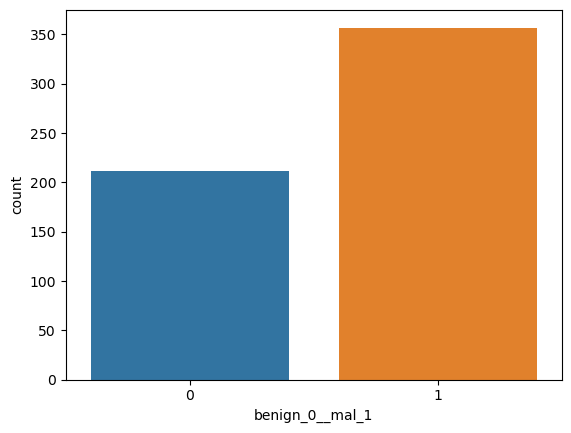

In [5]:
sns.countplot(x='benign_0__mal_1',data=df)

<Axes: >

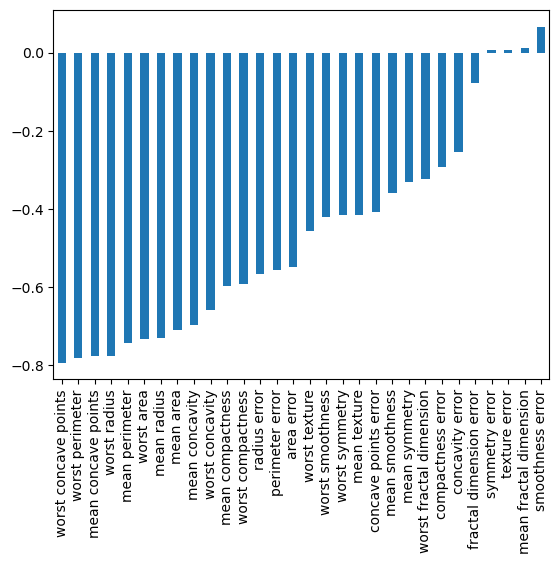

In [6]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<Axes: >

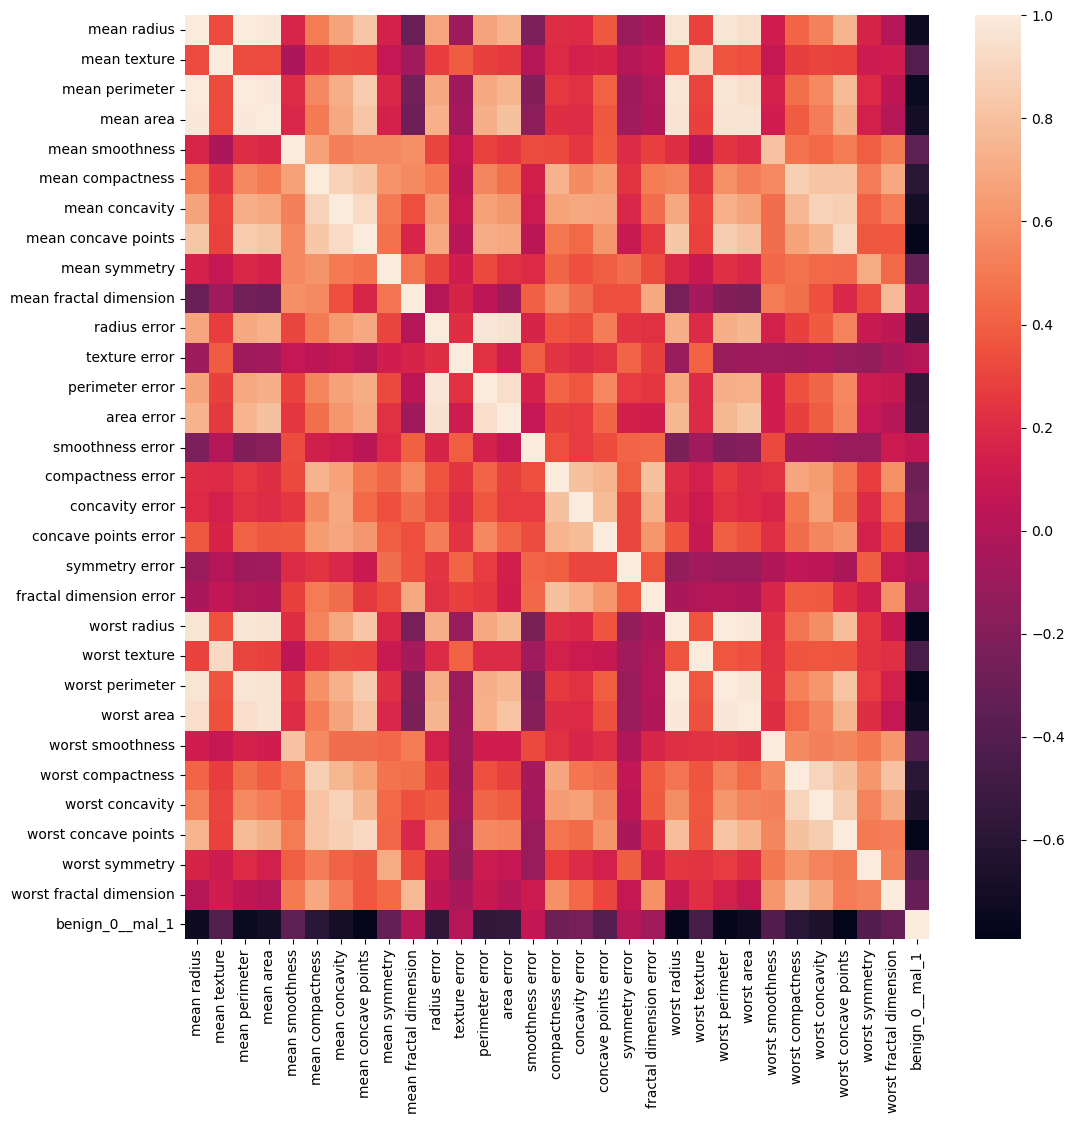

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [8]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=101)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler= MinMaxScaler()

In [13]:
X_train = scaler.fit_transform(X_train)


In [14]:
X_test = scaler.transform(X_test)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
X_train.shape

(426, 30)

In [17]:
model = Sequential()

In [18]:
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [19]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600

14/14 [==============================] - 1s 15ms/step - loss: 0.6841 - val_loss: 0.6730
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6584 - val_loss: 0.6493
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6309 - val_loss: 0.6130
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5911 - val_loss: 0.5697
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5475 - val_loss: 0.5285
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5047 - val_loss: 0.4822
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4605 - val_loss: 0.4351
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4154 - val_loss: 0.3891
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3752 - val_loss: 0.3491
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3400 - val_loss: 0.3147
Epoch 1

In [20]:
losses = pd.DataFrame(model.history.history)

<Axes: >

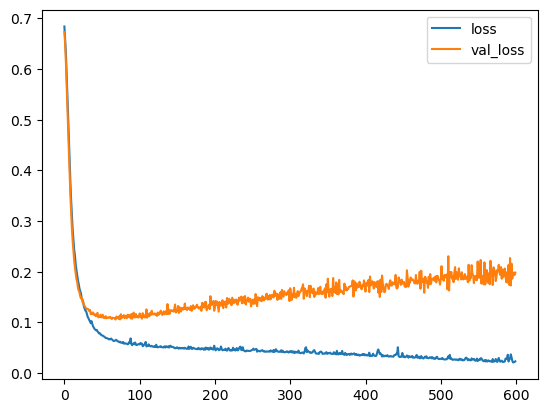

In [21]:
losses.plot()

In [22]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')


In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.src.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quanti

In [25]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [26]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6791 - val_loss: 0.6637
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6487 - val_loss: 0.6306
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6169 - val_loss: 0.5946
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5809 - val_loss: 0.5573
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5431 - val_loss: 0.5175
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5042 - val_loss: 0.4752
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4612 - val_loss: 0.4321
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4185 - val_loss: 0.3877
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3771 - val_loss: 0.3463
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3395 - val_loss: 0.3122
Epoch 11

In [27]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

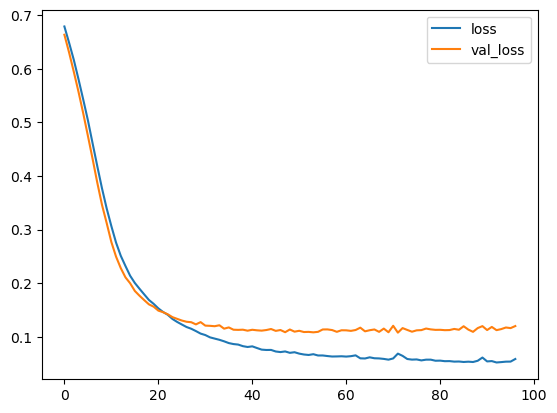

In [28]:
model_loss.plot()

In [29]:
from tensorflow.keras.layers import Dropout

In [30]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')


In [31]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.7395 - val_loss: 0.7114
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.7109 - val_loss: 0.6885
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6856 - val_loss: 0.6724
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6841 - val_loss: 0.6590
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6585 - val_loss: 0.6425
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6448 - val_loss: 0.6171
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6264 - val_loss: 0.5960
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6087 - val_loss: 0.5749
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5809 - val_loss: 0.5494
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5676 - val_loss: 0.5234
Epoch 11

In [32]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

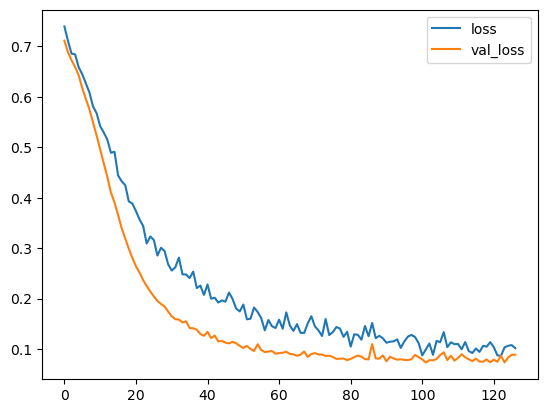

In [33]:
model_loss.plot()

In [34]:
x = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [35]:
predictions = (x>0.5).astype('int32')
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [38]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 4 84]]
